# Welcome to Jupyter!

This repo contains an introduction to [Jupyter](https://jupyter.org) and [IPython](https://ipython.org).

Outline of some basics:

* [Notebook Basics](../examples/Notebook/Notebook Basics.ipynb)
* [IPython - beyond plain python](../examples/IPython Kernel/Beyond Plain Python.ipynb)
* [Markdown Cells](../examples/Notebook/Working With Markdown Cells.ipynb)
* [Rich Display System](../examples/IPython Kernel/Rich Output.ipynb)
* [Custom Display logic](../examples/IPython%20Kernel/Custom%20Display%20Logic.ipynb)
* [Running a Secure Public Notebook Server](../examples/Notebook/Running%20the%20Notebook%20Server.ipynb#Securing-the-notebook-server)
* [How Jupyter works](../examples/Notebook/Multiple%20Languages%2C%20Frontends.ipynb) to run code in different languages.

You can also get this tutorial and run it on your laptop:

    git clone https://github.com/ipython/ipython-in-depth

Install IPython and Jupyter:

with [conda](https://www.anaconda.com/download):

    conda install ipython jupyter

with pip:

    # first, always upgrade pip!
    pip install --upgrade pip
    pip install --upgrade ipython jupyter

Start the notebook in the tutorial directory:

    cd ipython-in-depth
    jupyter notebook

In [1]:
import random
from IPython.display import Image
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import numpy.random as npr
import statistics
import copy
class Binario(object):
    def __init__(self, palavra, contagem):
        self.__palavra = palavra
        self.__contagem = contagem
    def __repr__(self):
        return "p:%s fitness:%s" % (self.__palavra, self.__contagem)
    def get_palavra(self):
        return self.__palavra
    def set_palavra(self, palavra):
        self.__palavra = palavra
    def get_fitness(self):
        return self.__contagem
    def set_fitness(self, contagem):
        self.__contagem = contagem
class genetico_binario(object):
    __populacao__ = []
    __listaMelhorIndividuo__ = []
    __melhor_individuo__ = Binario(None, 0.0)
    __max_geracoes__ = 0
    # Verificar mais parametros exigios
    def __init__(self, objetivo, geracoes, tPopulacao, probMultacao, probCruz, desvio, tRing):
        self.__obj__ = objetivo
        self.__geracoes__ = geracoes
        self.__n__ = tPopulacao
        self.ring = tRing
        self.pc = probCruz
        self.pm = probMultacao
        self.dev = desvio
        del self.__class__.__populacao__[:]
        del self.__class__.__listaMelhorIndividuo__[:]
    def bit(self):
        random.seed(a=None, version=2)
        binario = random.randrange(2)
        return str(binario)
    def palavra(self):
        tamanho = str.__len__(self.__obj__)
        palavra = ''
        for i in self.__obj__:
            palavra += self.bit()
        return palavra
    def contagem(self, palavra):
        contador = 0
        for j in range(len(palavra)):
            if palavra[j] == self.__obj__[j]:
                contador += 1
        return contador
    def criar_populacao_inicial(self):
        for i in range(self.__n__):
            palavra = self.palavra()
            contador = self.contagem(palavra)
            fitness = 100 * contador / len(self.__obj__)
            self.__class__.__populacao__.append(Binario(palavra, fitness))
    def selecao(self, ring, popToreio):
        pop = copy.copy(popToreio)
        selecionados = []
        selecionados = np.zeros(len(pop), Binario)
        for i in range(0, len(pop)):
            competidores = np.random.choice(pop, size=ring)
            # print( competidores )
            if npr.uniform() < 1 - ring / len(pop):
                selecionados[i] = max(competidores, key=Binario.get_fitness)
                # print( 'Ganhador max: ', selecionados[ i ] )
            else:
                selecionados[i] = max(competidores, key=Binario.get_fitness)
                # print( 'Ganhador min: ', selecionados)
        return selecionados
    def cruzamento(self, pc, popCruzamento):
        # Cruzamento feito de acordo com a probabilidde
        nPopCruzamento = popCruzamento
        for n in range(0, len(nPopCruzamento), 2):
            pais = nPopCruzamento[n: n + 2]
            if len(pais) == 2:
                pontoCorte1 = np.random.randint(len(pais[0].get_palavra()))
                pontoCorte2 = np.random.randint(len(pais[1].get_palavra()))
                if pontoCorte1 < pontoCorte2:
                    ind1terco1 = pais[0].get_palavra()[0:pontoCorte1]
                    ind1terco2 = pais[0].get_palavra()[pontoCorte1:pontoCorte2]
                    ind1terco3 = pais[0].get_palavra()[pontoCorte2:len(pais[0].get_palavra())]
                    ind2terco1 = pais[1].get_palavra()[0:pontoCorte1]
                    ind2terco2 = pais[1].get_palavra()[pontoCorte1:pontoCorte2]
                    ind2terco3 = pais[1].get_palavra()[pontoCorte2:len(pais[1].get_palavra())]
                    pais[0].set_palavra(ind1terco1 + ind2terco2 + ind1terco3)
                    pais[1].set_palavra(ind2terco1 + ind1terco2 + ind2terco3)
        return nPopCruzamento
    def mutacao(self, pm, dev, popMult):
        for individuo in popMult:
            for gene in range(len(individuo.get_palavra())):
                if npr.uniform() < pm:
                    if individuo.get_palavra()[gene] == '0':
                        # print("1: ", individuo.get_palavra())
                        individuo.set_palavra(
                            individuo.get_palavra()[0:gene] + '1' +
                            individuo.get_palavra()[gene + 1:len(individuo.get_palavra())])
                        # print("2: ", individuo.get_palavra())
                        # individuo.get_palavra()[gene] = '1'
                    else:
                        # print("1: ", individuo.get_palavra())
                        individuo.set_palavra(
                            individuo.get_palavra()[0:gene] + '0' +
                            individuo.get_palavra()[gene + 1:len(individuo.get_palavra())])
                        # print("2: ", individuo.get_palavra())
                    # Verificar vizinhos
                    s = npr.normal(0, dev, 1)
                    if not (s > -1.5 * dev and s < 1.5 * dev):
                        if gene + 1 < len(individuo.get_palavra()):
                            if individuo.get_palavra()[gene + 1] == '0':
                                individuo.set_palavra(
                                    individuo.get_palavra()[0:gene + 1] + '1' +
                                    individuo.get_palavra()[gene + 2:len(individuo.get_palavra())])
                            else:
                                individuo.set_palavra(
                                    individuo.get_palavra()[0:gene + 1] + '0' +
                                    individuo.get_palavra()[gene + 2:len(individuo.get_palavra())])
                        if gene - 1 > 0:
                            if individuo.get_palavra()[gene - 1] == '0':
                                individuo.set_palavra(
                                    individuo.get_palavra()[0:gene - 1] + '1' +
                                    individuo.get_palavra()[gene:len(individuo.get_palavra())])
                            else:
                                individuo.set_palavra(
                                    individuo.get_palavra()[0:gene - 1] + '1' +
                                    individuo.get_palavra()[gene:len(individuo.get_palavra())])
        return popMult
    def avaliacao(self, populacao):
        for ind in populacao:
            contador = self.contagem(ind.get_palavra())
            fitness = 100 * contador / len(self.__obj__)
            ind.set_fitness(fitness)
    def elitismo(self, populacao):
        if g.__melhor_individuo__.get_fitness() < populacao[0].get_fitness():
            g.__melhor_individuo__ = copy.copy(populacao[0])
        populacao[npr.randint(int(len(populacao) / 2), len(populacao))] = g.__melhor_individuo__
    def ordenar(self):
        lista_binarios_ordenados = None
        lista_binarios_ordenados = sorted(self.__class__.__populacao__, key=Binario.get_fitness, reverse=True)
        self.__class__.__populacao__ = lista_binarios_ordenados
    def remover_metade(self):
        self.__class__.__populacao__[
        int(len(self.__class__.__populacao__) / 2): len(self.__class__.__populacao__)] = []
    def executa(self):
        # Inicialização e Avaliacao
        g.criar_populacao_inicial()
        g.ordenar()
        # print("Populacao Inicial: ", print(p.__populacao__))
        for n in range(self.__geracoes__):
            # Selecao
            # Selecionar um número igual ao rank de indivíduos
            popTorneio = g.selecao(self.ring, self.__class__.__populacao__)
            # cruzamento
            popCruzamento = g.cruzamento(self.pc, popTorneio)
            # Mutação
            popMutacao = g.mutacao(self.pm, self.dev, popCruzamento)
            # Nova população
            g.__populacao__ = copy.copy(popMutacao)
            # Avaliação
            self.avaliacao(g.__populacao__)
            # Ordenar População
            g.ordenar()
            # Elitismo
            g.elitismo(g.__populacao__)
            g.__listaMelhorIndividuo__.append(self.__melhor_individuo__)
            # print(g.__populacao__)
            g.__max_geracoes__ = n
            if (self.__melhor_individuo__.get_palavra() == self.__obj__):
                break
                # print(p.__melhor_individuo__)
    @classmethod
    def all(cls):
        return cls.__populacao__
class Palavra_Binaria(object):
    __populacao__ = []
    __listaMelhorIndividuo__ = []
    __melhor_individuo__ = Binario(None, 0.0)
    __max_geracoes__ = 0
    def __init__(self, objetivo, iteracoes, nPalavras):
        self.__obj__ = objetivo
        self.__it__ = iteracoes
        self.__n__ = nPalavras
        del self.__class__.__populacao__[:]
        del self.__class__.__listaMelhorIndividuo__[:]
    def bit(self):
        random.seed(a=None, version=2)
        binario = random.randrange(2)
        return str(binario)
    def palavra(self):
        tamanho = str.__len__(self.__obj__)
        palavra = ''
        for i in self.__obj__:
            palavra += self.bit()
        return palavra
    def contagem(self, palavra):
        contador = 0
        for j in range(len(palavra)):
            if palavra[j] == self.__obj__[j]:
                contador += 1
        return contador
    def criar_binarios_inicial(self):
        for i in range(self.__n__):
            palavra = self.palavra()
            contador = self.contagem(palavra)
            fitness = 100 * contador / len(self.__obj__)
            self.__class__.__populacao__.append(Binario(palavra, fitness))
    def criar_binarios_metade(self):
        for i in range(int(self.__n__ / 2)):
            palavra = self.palavra()
            contador = self.contagem(palavra)
            fitness = 100 * contador / len(self.__obj__)
            self.__class__.__populacao__.append(Binario(palavra, fitness))
    def ordenar(self):
        lista_binarios_ordenados = None
        lista_binarios_ordenados = sorted(self.__class__.__populacao__, key=Binario.get_fitness, reverse=True)
        self.__class__.__populacao__ = lista_binarios_ordenados
    def elitismo(self, populacao):
        if r.__melhor_individuo__.get_fitness() < populacao[0].get_fitness():
            r.__melhor_individuo__ = copy.copy(populacao[0])
    def remover_metade(self):
        self.__class__.__populacao__[
        int(len(self.__class__.__populacao__) / 2): len(self.__class__.__populacao__)] = []
    def executa(self):
        r.criar_binarios_inicial()
        r.ordenar()
        for k in range(self.__it__):
            r.remover_metade()
            r.criar_binarios_metade()
            r.ordenar()
            r.elitismo(r.__populacao__)
            r.__listaMelhorIndividuo__.append(self.__melhor_individuo__)
            r.__max_geracoes__ = n
            if (self.__class__.__populacao__[0].get_palavra() == self.__obj__):
                break
    @classmethod
    def all(cls):
        return cls.__populacao__

In [2]:
if __name__ == '__main__':
    # Palavra_A = 0b1110010001000110 #15 genes
    # Palavra_B = 0b10110110011010000000011111 #25 genes
    # Palavra_C = 0b11110001010100000110100111000100011000110 #40 genes
    Palavras = []
    Palavras.append("110010001000110")  # 15 genes
    Palavras.append("0110110011010000000011111")  # 25 genes
    Palavras.append("1110001010100000110100111000100011000110")  # 40 genes
    meanFitFinalBest_G = []
    stdFitFinalBest_G = []
    numGenerationsMeanPalavra_G = []
    stdFitFinalBestNumGenPalavras_G = []
    meanFitFinalBest_R = []
    stdFitFinalBest_R = []
    numGenerationsMeanPalavra_R = []
    stdFitFinalBestNumGenPalavras_R = []
    meanFitFinalBestPopSize_G = []
    stdFitFinalBestPopSize_G = []
    meanFitFinalBestPopSize_R = []
    stdFitFinalBestPopSize_R = []
    meanFitBest_G_pal = []
    stdFitBest_G_pal = []
    delta_superior_G_pal = []
    delta_inferior_G_pal = []
    # Guarda o melhor das 30 execuções para cada populacao
    lista_maxfitness_execucao_G_pal = []
    # Fazer para cada palavra
    for palavra in Palavras:
        palavra_utilizada = palavra
        nGeracoes = 500
        nExecucoes = 30
        pm = 0.03
        pc = 0.2
        dev = 0.5
        ring = 5
        numGenerationsMeanPopSize_G = []
        stdFitFinalBestNumGenPopSize_G = []
        numGenerationsMeanPopSize_R = []
        stdFitFinalBestNumGenPopSize_R = []
        del meanFitFinalBestPopSize_G[:]
        del stdFitFinalBestPopSize_G[:]
        del meanFitFinalBestPopSize_R[:]
        del stdFitFinalBestPopSize_R[:]
        meanFitBest_G_pop = []
        stdFitBest_G_pop = []
        delta_superior_G_pop = []
        delta_inferior_G_pop = []
        #Guarda o melhor das 30 execuções para cada populacao
        lista_maxfitness_execucao_G_pop = []
        for tamPopulacao in [50 100 1000]:
            # Fazer para três tamahos de população
            tamanho_populacao = tamPopulacao
            # Fazer para 30 execuções
            meanFitBest_G = []
            stdFitBest_G = []
            delta_superior_G = []
            delta_inferior_G = []
            lista_numero_geracoes_execucao_G = []
            lista_maxfitness_execucao_G = []
            fitBestIndByGeneration_G = []
            #Execução do Genético
            for i in range(nExecucoes):
                g = genetico_binario(palavra_utilizada, nGeracoes, tamanho_populacao, pm, pc, dev, ring)
                g.executa()
                lista_maxfitness_execucao_G.append(g.__melhor_individuo__)
                fitBestIndByGeneration_G.append(g.__listaMelhorIndividuo__)
                lista_numero_geracoes_execucao_G.append(g.__max_geracoes__)
            lista_maxfitness_execucao_G_pop.append(lista_maxfitness_execucao_G)
            numGenerationsMeanPopSize_G.append(np.mean(lista_numero_geracoes_execucao_G))
            stdFitFinalBestNumGenPopSize_G.append(np.std(lista_numero_geracoes_execucao_G))
            #Setar todos com a mesma quantidade de gerações
            for ind_execucao in range(len(fitBestIndByGeneration_G)):
                for j in range(len(fitBestIndByGeneration_G[ind_execucao])-1, max(lista_numero_geracoes_execucao_G)):
                    fitBestIndByGeneration_G[ind_execucao].append(lista_maxfitness_execucao_G[ind_execucao])
            list_to_mean_std_fitBestIndByGeneration_gener = []
            for n in range(max(lista_numero_geracoes_execucao_G)):
                del list_to_mean_std_fitBestIndByGeneration_gener[:]
                for x in range(len(fitBestIndByGeneration_G)):
                    list_to_mean_std_fitBestIndByGeneration_gener.append(fitBestIndByGeneration_G[x][n].get_fitness())
                meanFitBest_G.append(np.mean(list_to_mean_std_fitBestIndByGeneration_gener))
                stdFitBest_G.append(np.std(list_to_mean_std_fitBestIndByGeneration_gener))
                delta_superior_G.append(meanFitBest_G[n] + stdFitBest_G[n])
                delta_inferior_G.append(meanFitBest_G[n] - stdFitBest_G[n])
            meanFitBest_G_pop.append(meanFitBest_G)
            stdFitBest_G_pop.append(stdFitBest_G)
            delta_superior_G_pop.append(delta_superior_G)
            delta_inferior_G_pop.append(delta_inferior_G)
                # Plotar um grafico da média das iterações por execução disso aqui
            # x.get_contagem() for x in self.__class__.__listaPalavras__
            list_to_mean_std_fitBestIndByGeneration_exec = []
            for x in range(len(fitBestIndByGeneration_G)):
                list_to_mean_std_fitBestIndByGeneration_exec.append(
                    fitBestIndByGeneration_G[x][max(lista_numero_geracoes_execucao_G)].get_fitness())
            # Plotar um gráfico para cada tamanho de população, a media e desvio padrão de acertos para cada palavra
            meanFitFinalBestPopSize_G.append(np.mean(list_to_mean_std_fitBestIndByGeneration_exec))
            stdFitFinalBestPopSize_G.append(np.std(list_to_mean_std_fitBestIndByGeneration_exec))
            # print(list_to_mean_std)
            # print(meanFitFinalBestPopSize)
            # print(stdFitFinalBestPopSize)
            meanFitBest_B = []
            stdFitBest_B = []
            delta_superior_B = []
            delta_inferior_B = []
            lista_numero_geracoes_execucao_R = []
            lista_maxfitness_execucao_R = []
            fitBestIndByGeneration_R = []
            # Execução do Random
            for i in range(nExecucoes):
                r = Palavra_Binaria(palavra_utilizada, nGeracoes, tamanho_populacao)
                r.executa()
                lista_maxfitness_execucao_R.append(r.__melhor_individuo__)
                fitBestIndByGeneration_R.append(r.__listaMelhorIndividuo__)
                lista_numero_geracoes_execucao_R.append(r.__max_geracoes__)
            numGenerationsMeanPopSize_R.append(np.mean(lista_numero_geracoes_execucao_R))
            stdFitFinalBestNumGenPopSize_R.append(np.std(lista_numero_geracoes_execucao_R))
            #Setar todos com a mesma quantidade de gerações
            for ind_execucao in range(len(fitBestIndByGeneration_R)):
                for j in range(len(fitBestIndByGeneration_R[ind_execucao])-1, max(lista_numero_geracoes_execucao_R)):
                    fitBestIndByGeneration_R[ind_execucao].append(lista_maxfitness_execucao_R[ind_execucao])
            for n in range(max(lista_numero_geracoes_execucao_R)):
                list_to_mean_std_fitBestIndByGeneration_gener = []
                for x in range(len(fitBestIndByGeneration_R)):
                    list_to_mean_std_fitBestIndByGeneration_gener.append(fitBestIndByGeneration_R[x][n].get_fitness())
                meanFitBest_B.append(np.mean(list_to_mean_std_fitBestIndByGeneration_gener))
                stdFitBest_B.append(np.std(list_to_mean_std_fitBestIndByGeneration_gener))
                delta_superior_B.append(meanFitBest_B[n] + stdFitBest_B[n])
                delta_inferior_B.append(meanFitBest_B[n] - stdFitBest_B[n])
                # Plotar um grafico da média das iterações por execução disso aqui
            # x.get_contagem() for x in self.__class__.__listaPalavras__
            list_to_mean_std_fitBestIndByGeneration_exec = []
            for x in range(len(fitBestIndByGeneration_R)):
                list_to_mean_std_fitBestIndByGeneration_exec.append(
                    fitBestIndByGeneration_R[x][max(lista_numero_geracoes_execucao_R)].get_fitness())
            # Plotar um gráfico para cada tamanho de população, a media e desvio padrão de acertos para cada palavra
            meanFitFinalBestPopSize_R.append(np.mean(list_to_mean_std_fitBestIndByGeneration_exec))
            stdFitFinalBestPopSize_R.append(np.std(list_to_mean_std_fitBestIndByGeneration_exec))
        lista_maxfitness_execucao_G_pal.append(lista_maxfitness_execucao_G_pop)
        meanFitBest_G_pal.append(meanFitBest_G_pop)
        stdFitBest_G_pal.append(stdFitBest_G_pop)
        delta_superior_G_pal.append(delta_superior_G_pop)
        delta_inferior_G_pal.append(delta_inferior_G_pop)
        # Plotar um gráfico para a maior palavra e para a menhor palavra, media e desvio padrão para cada tamanho de população
        meanFitFinalBest_G.append(copy.copy(meanFitFinalBestPopSize_G))
        stdFitFinalBest_G.append(copy.copy(stdFitFinalBestPopSize_G))
        # Plotar um gráfico para a maior palavra e para a menhor palavra, media e desvio padrão para cada tamanho de população
        meanFitFinalBest_R.append(meanFitFinalBestPopSize_R)
        stdFitFinalBest_R.append(stdFitFinalBestPopSize_R)
        # Grafico do numero de gerações medio
        numGenerationsMeanPalavra_G.append(numGenerationsMeanPopSize_G)
        stdFitFinalBestNumGenPalavras_G.append(stdFitFinalBestNumGenPopSize_G)
        # Grafico do numero de gerações medio
        numGenerationsMeanPalavra_R.append(numGenerationsMeanPopSize_R)
        stdFitFinalBestNumGenPalavras_R.append(stdFitFinalBestNumGenPopSize_R)
        # Fazer uma tabela com número de acertos considerando a margem de erro

/srv/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


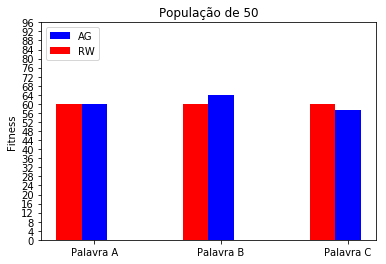

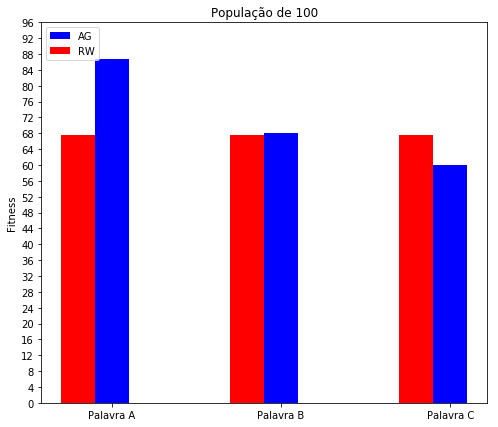

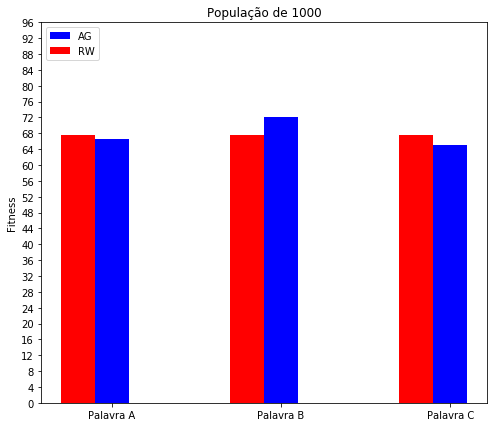

In [4]:
# Plotar um gráfico para cada tamanho de população, a media e desvio padrão de acertos para cada palavra
popu = ["População de 50", "População de 100", "População de 1000"]
pala = ["Palavra A", "Palavra B", "Palavra C"]
for pop in range(len(meanFitFinalBest_G[0])):
    meanFitFinalBest_G_pop = []
    stdFitFinalBest_G_pop = []
    for x in range(len(meanFitFinalBest_G)):
        meanFitFinalBest_G_pop.append(meanFitFinalBest_G[x][pop])
        stdFitFinalBest_G_pop.append(stdFitFinalBest_G[x][pop])
    meanFitFinalBest_R_pop = []
    stdFitFinalBest_R_pop = []
    for x in range(len(meanFitFinalBest_R)):
        meanFitFinalBest_R_pop.append(meanFitFinalBest_R[x][pop])
        stdFitFinalBest_R_pop.append(stdFitFinalBest_R[x][pop])
    ind = np.arange(len(meanFitFinalBest_G))  # the x locations for the groups
    width = 0.2  # the width of the bars: can also be len(x) sequence
    plt.bar(ind, meanFitFinalBest_G_pop, width, yerr=stdFitFinalBest_G_pop, color = 'b',  label='AG')
    plt.bar(ind - width, meanFitFinalBest_R_pop, width, yerr=stdFitFinalBest_R_pop, color = 'r', label='RW')
    plt.ylabel('Fitness')
    plt.title(popu[pop])
    plt.xticks(ind)
    ax = plt.subplot()
    ax.set_xticklabels(pala)
    plt.yticks(np.arange(0, 100, 4))
    plt.legend(loc='upper left')#, bbox_to_anchor=(0.1, -0.15), ncol=5)
    plt.rcParams['figure.figsize'] = (8, 7)
    plt.show()
   

/srv/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


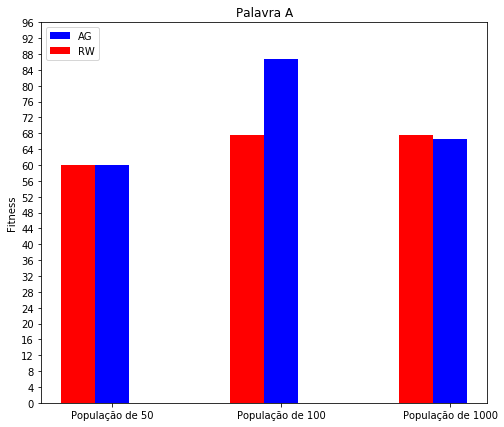

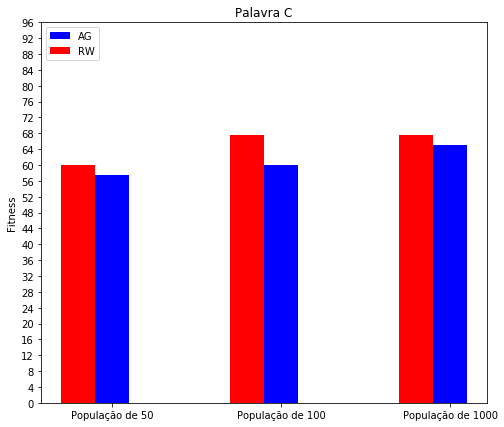

In [5]:
 # Plotar um gráfico para a maior palavra e para a menhor palavra, media e desvio padrão para cada tamanho de população
pal = 0
while pal < len(meanFitFinalBest_G):
    ind = np.arange(len(meanFitFinalBest_G[pal]))  # the x locations for the groups
    width = 0.2  # the width of the bars: can also be len(x) sequence
    plt.bar(ind, meanFitFinalBest_G[pal], width, yerr=stdFitFinalBest_G[pal], color = 'b', label='AG')
    plt.bar(ind - width, meanFitFinalBest_R[pal], width, yerr=stdFitFinalBest_R[pal], color = 'r', label='RW')
    plt.ylabel('Fitness')
    plt.title(pala[pal])
    plt.xticks(ind)
    ax = plt.subplot()
    ax.set_xticklabels(popu)
    plt.yticks(np.arange(0, 100, 4))
    plt.legend(loc='upper left')#, bbox_to_anchor=(0.1, -0.15), ncol=5)
    plt.rcParams['figure.figsize'] = (8, 7)
    plt.show()
    pal += 2
   

/srv/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


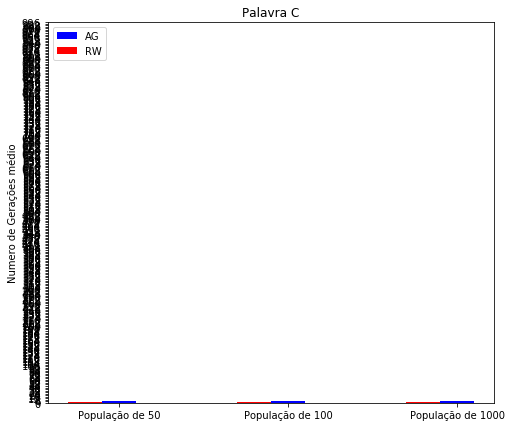

In [6]:
 #Numero de Gerações medio por maior palavra
ind = np.arange(len(stdFitFinalBestNumGenPalavras_G[2]))  # the x locations for the groups
width = 0.2  # the width of the bars: can also be len(x) sequence
plt.bar(ind,  numGenerationsMeanPalavra_G[2], width, yerr=stdFitFinalBestNumGenPalavras_G[2], color = 'b', label='AG')
plt.bar(ind - width,  numGenerationsMeanPalavra_R[2], width, yerr=stdFitFinalBestNumGenPalavras_R[2], color = 'r', label='RW')
plt.ylabel('Numero de Gerações médio')
plt.title(pala[2])
plt.xticks(ind)
ax = plt.subplot()
ax.set_xticklabels(popu)
plt.yticks(np.arange(0, 1000, 4))
plt.legend(loc='upper left')#, bbox_to_anchor=(0.1, -0.15), ncol=5)
plt.rcParams['figure.figsize'] = (8, 7)
plt.show()
   

/srv/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


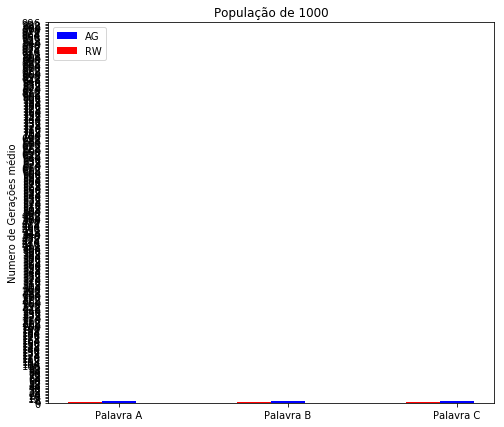

In [7]:
 # Numero de Gerações medio por tamanho de população
ind = np.arange(len(numGenerationsMeanPalavra_G))  # the x locations for the groups
width = 0.2  # the width of the bars: can also be len(x) sequence
numGenerationsMeanPalavra_G_pop = []
stdFitFinalBestNumGenPalavras_G_pop = []
for x in range(len(meanFitFinalBest_G)):
    numGenerationsMeanPalavra_G_pop.append(numGenerationsMeanPalavra_G[x][2])
    stdFitFinalBestNumGenPalavras_G_pop.append(stdFitFinalBestNumGenPalavras_G[x][2])
numGenerationsMeanPalavra_R_pop = []
stdFitFinalBestNumGenPalavras_R_pop = []
for x in range(len(meanFitFinalBest_R)):
    numGenerationsMeanPalavra_R_pop.append(numGenerationsMeanPalavra_R[x][2])
    stdFitFinalBestNumGenPalavras_R_pop.append(stdFitFinalBestNumGenPalavras_R[x][2])
plt.bar(ind, numGenerationsMeanPalavra_G_pop, width, yerr=stdFitFinalBestNumGenPalavras_G_pop, color='b', label='AG')
plt.bar(ind - width, numGenerationsMeanPalavra_R_pop, width, yerr=stdFitFinalBestNumGenPalavras_R_pop, color='r',
        label='RW')
plt.ylabel('Numero de Gerações médio')
plt.title(popu[2])
plt.xticks(ind)
ax = plt.subplot()
ax.set_xticklabels(pala)
plt.yticks(np.arange(0, 1000, 4))
plt.legend(loc='upper left')  # , bbox_to_anchor=(0.1, -0.15), ncol=5)
plt.rcParams['figure.figsize'] = (8, 7)
plt.show()
   

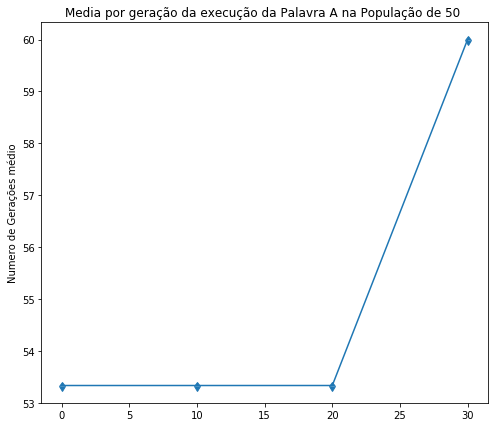

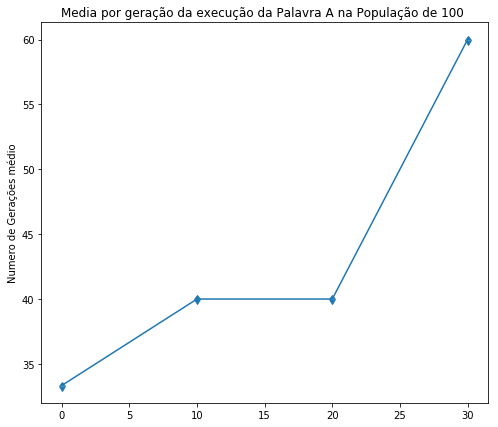

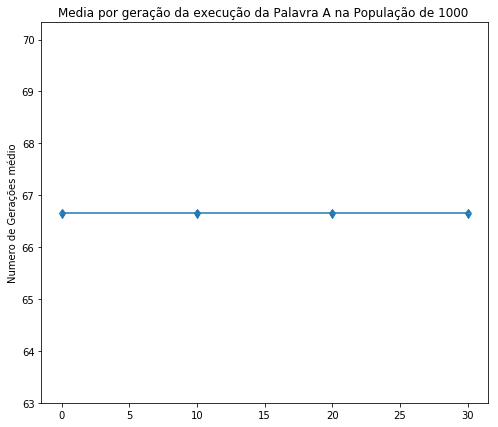

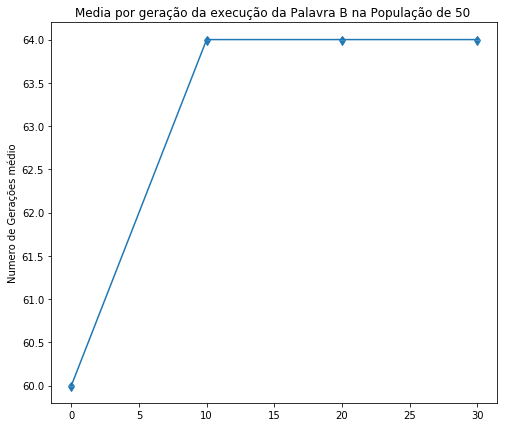

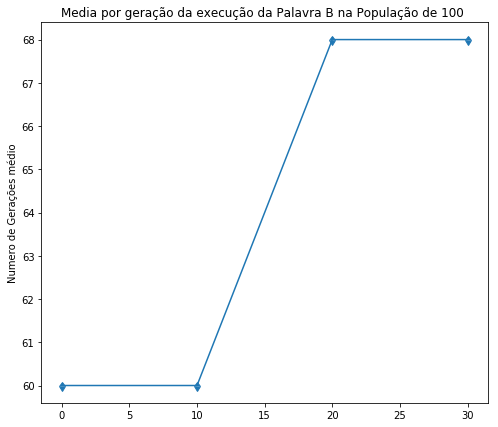

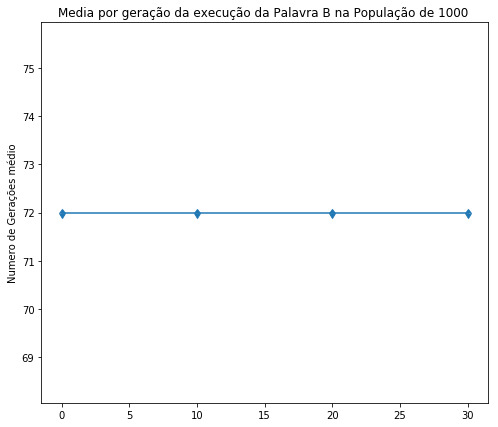

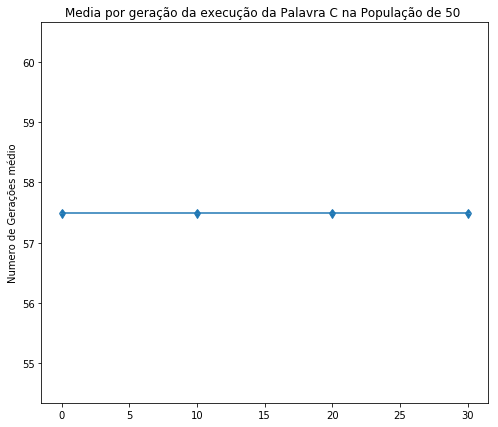

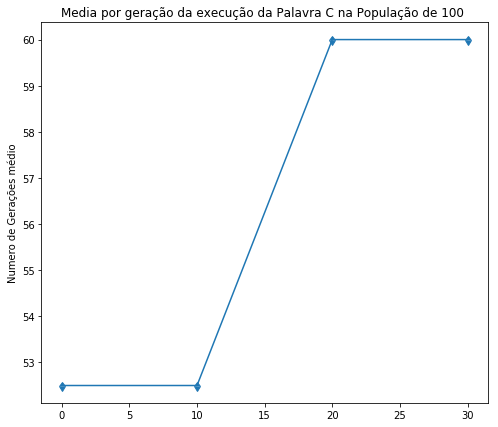

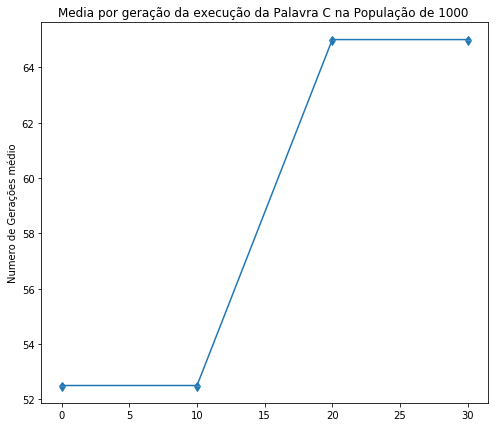

In [8]:
 # Grafico de media por geração
medpal =0
while medpal < len(meanFitBest_G_pal):
    medpop = 0
    while medpop < len(meanFitBest_G_pal[medpal]):
        x = 10 * np.array(range(len(meanFitBest_G_pal[medpal][medpop])))
        plt.errorbar(x, meanFitBest_G_pal[medpal][medpop], yerr=stdFitBest_G_pal[medpal][medpop],
                     uplims=delta_superior_G_pal[medpal][medpop], lolims=delta_inferior_G_pal[medpal][medpop])
        plt.title('Media por geração da execução da {0} na {1} '.format(pala[medpal], popu[medpop]))
        plt.ylabel('Numero de Gerações médio')
        plt.rcParams['figure.figsize'] = (8, 7)
        plt.show()
        medpop += 1
    medpal += 1
    

In [9]:
for maxfitnnesspal in range(len(lista_maxfitness_execucao_G_pal)):
        print(pala[maxfitnnesspal])
        for maxfitnnesspop in range(len(lista_maxfitness_execucao_G_pal[maxfitnnesspal])):
            print('Melhor conjunto fitness da população de ', popu[maxfitnnesspop])
            for individuo in lista_maxfitness_execucao_G_pal[maxfitnnesspal][maxfitnnesspop]:
                print(individuo.get_fitness(), '\t')

Palavra A
Melhor conjunto fitness da população de  População de 50
73.33333333333333 	
73.33333333333333 	
60.0 	
60.0 	
60.0 	
60.0 	
66.66666666666667 	
93.33333333333333 	
60.0 	
60.0 	
Melhor conjunto fitness da população de  População de 100
53.333333333333336 	
66.66666666666667 	
66.66666666666667 	
73.33333333333333 	
73.33333333333333 	
73.33333333333333 	
73.33333333333333 	
80.0 	
60.0 	
86.66666666666667 	
Melhor conjunto fitness da população de  População de 1000
66.66666666666667 	
86.66666666666667 	
60.0 	
73.33333333333333 	
86.66666666666667 	
66.66666666666667 	
66.66666666666667 	
73.33333333333333 	
66.66666666666667 	
66.66666666666667 	
Palavra B
Melhor conjunto fitness da população de  População de 50
68.0 	
72.0 	
72.0 	
68.0 	
64.0 	
56.0 	
68.0 	
76.0 	
72.0 	
64.0 	
Melhor conjunto fitness da população de  População de 100
68.0 	
64.0 	
68.0 	
72.0 	
60.0 	
68.0 	
60.0 	
64.0 	
68.0 	
68.0 	
Melhor conjunto fitness da população de  População de 1000
60.0 	
6